FINAL PROJECT

Outline :
    - EDA
    - 
    - 

1. Exploratory Data Analysis

In [3]:
# used packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from string import ascii_letters
import matplotlib.pyplot as plt

Berikut data yang akan digunakan pada final project ini :

In [46]:
### IMPORT DATA
df = pd.DataFrame(pd.read_csv('./forestfires.csv', sep= ','))
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Deskripsi tiap kolom sbb :
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [47]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Apakah tidak ada data kosong pada data?

In [48]:
all(df.isnull()==False)

True

Karena masih ada kolom yg berisi string (kolom 'month' dan 'day'), maka akan dimapping tiap string ke suatu angka sbb :


    - month : jan = 1, feb = 2, ..., dec = 12

    - day : mon = 1, tue = 2, ..., sun = 7

In [50]:
map_month = pd.DataFrame({'month':['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        'month_int':[1,2,3,4,5,6,7,8,9,10,11,12]})
map_day =  pd.DataFrame({'day':['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
                        'day_int':[1,2,3,4,5,6,7]})
df = df.merge(map_month, on='month', how='left')
df = df.merge(map_day, on='day', how='left')

Kemudian plot histogram untuk melihat distribusi kolom :

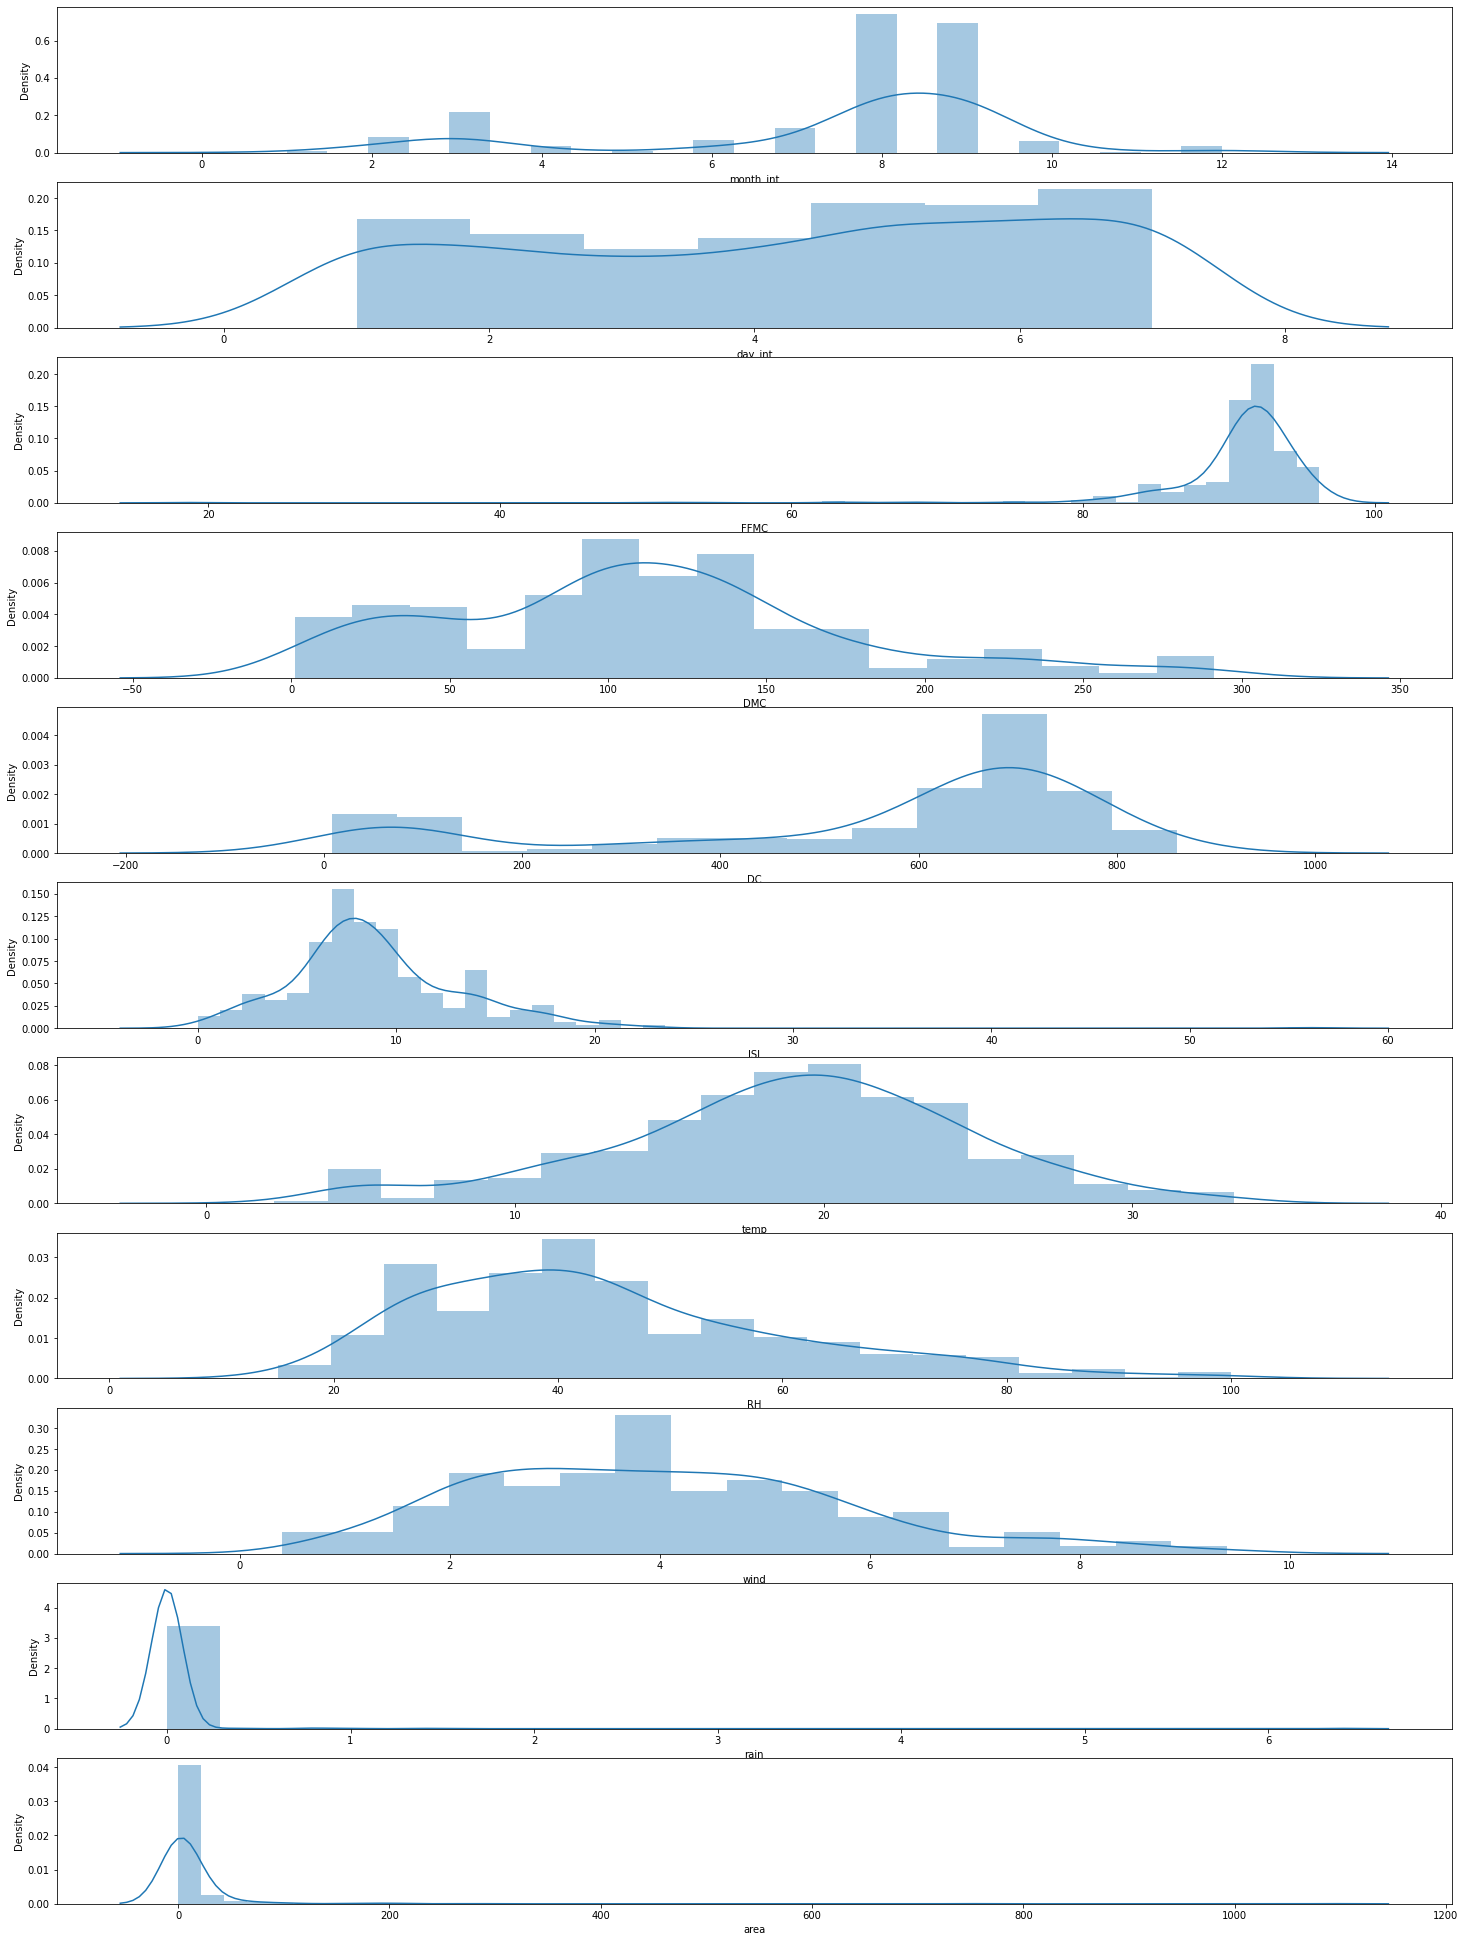

In [51]:
import warnings
warnings.filterwarnings('ignore')
nums = df[['month_int', 'day_int', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

plt.figure(figsize=(25,80))
for i, column in enumerate(nums.columns):
    plt.subplot(25, 1, i+1); sns.distplot(nums[column])

Overall, hampir semua fitur sudah cukup mendekati normal.

Selanjutnya, jika ingin memprediksi potensi kebakaran hutan, maka perlu tambahan 1 kolom (akan diberi nama 'burned') yang menyatakan terjadi/tidak sebuah kebakaran pada area tersebut. 

In [53]:
burned = []
for i in df.area:
    if i==0:
        burned.append(0)
    else:
        burned.append(1)
df['burned'] = burned

Sehingga sekarang dapat dilihat banyak sebaran data kebakaran pada dataframe

[Text(0, 0.5, 'Percent')]

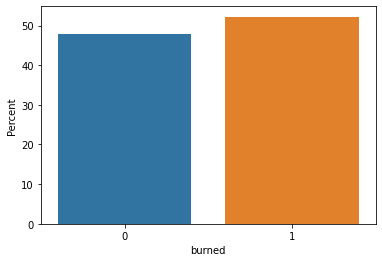

In [54]:
ax = sns.barplot(x='burned', y="burned", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Pada barchart di atas dapat disimpulkan bahwa data yang ada telah memberikan sampel yang cukup balance untuk tiap klasifikasi, sehingga tidak diperlukan tindakan lebih lanjut untuk balancing data.

Selanjutnya, akan dilihat korelasi linier antar fitur

<AxesSubplot:>

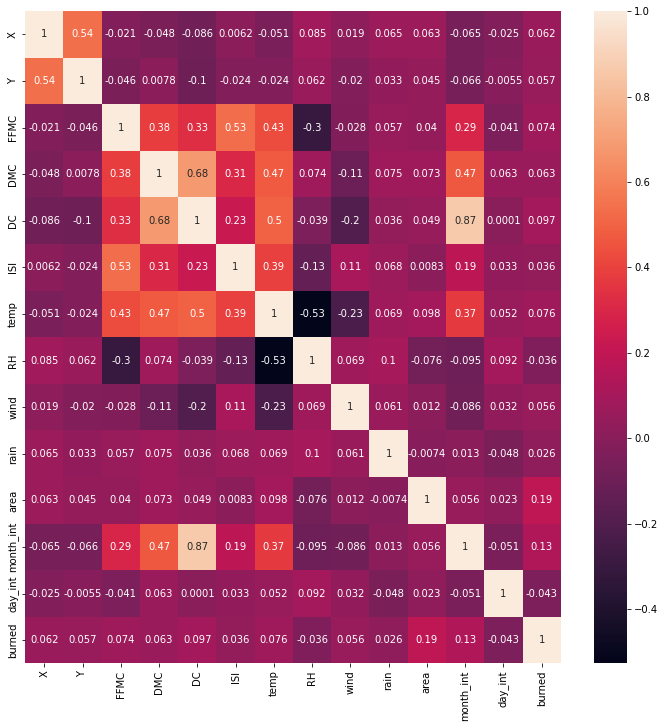

In [67]:
### LINEAR CORRELATION
plt.figure(figsize=(12,12))
linearCorr = df.corr()
sns.heatmap(linearCorr, annot=True)

Terkait persoalan klasifikasi, semua fitur menunjukkan korelasi linier yang mendekati nol terhadap fitur 'burned', berarti terjadi atau tidaknya kebakaran hutan tidak berkolerasi secara linier terhadap apapun. Maka belum dapat ditentukan fitur yang akan digunakan sebagai prediktor.

In [ ]:
PCA analysis :

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


ValueError: could not convert string to float: 'mar'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


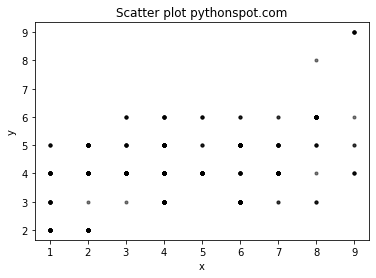

In [65]:
# Create data
N = 500
x = df.X
y = df.Y
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
df_clean = df.drop(['month','day'], axis=1)

In [18]:
df_clean

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_int,day_int
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,3,5
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,2
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,6
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,3,5
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,7
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,7
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,7
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,6


In [21]:

data = preprocessing.normalize(df_clean)

<AxesSubplot:>

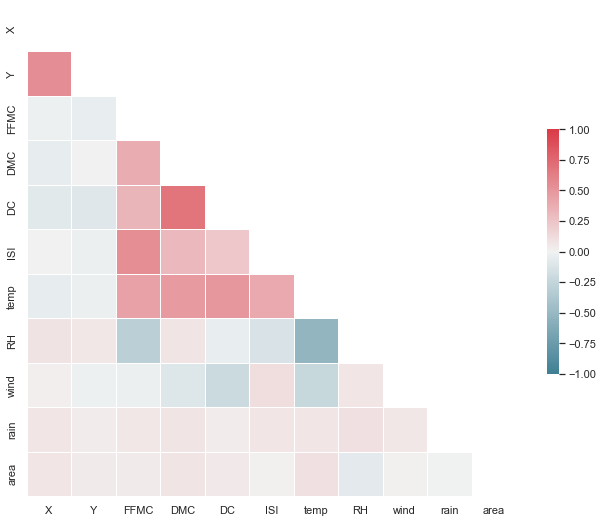

In [22]:


sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(linearCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(linearCorr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ValueError: could not convert string to float: 'mar'